In [1]:
import cv2
import PIL.Image
from io import BytesIO
import IPython.display

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


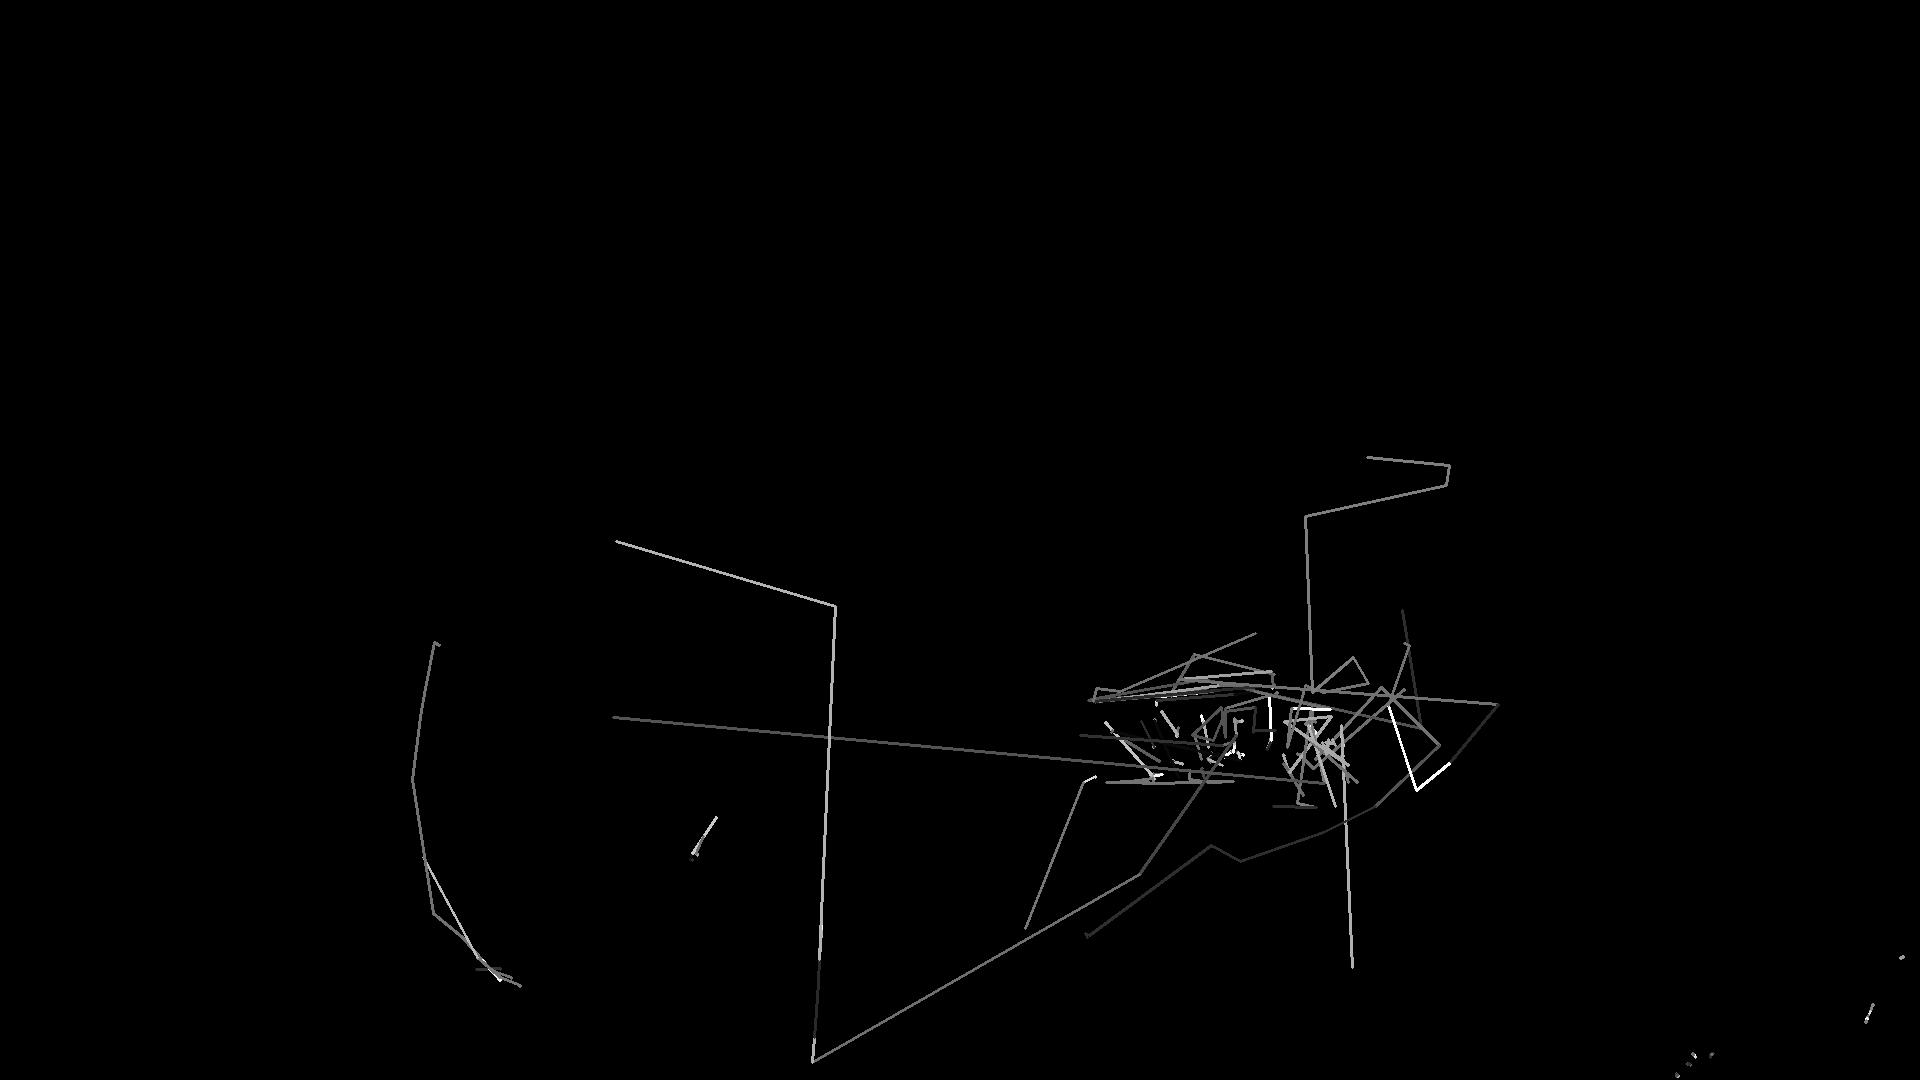

In [3]:
image_display = IPython.display.display("", display_id=1)

In [4]:
video = cv2.VideoCapture(0)

ret, frame = video.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
prev = frame

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )

p0 = cv2.goodFeaturesToTrack(prev, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(prev)
# Create some random colors
color = np.random.randint(0,255,(100,3))

iterations = 0
while iterations < 1000:

    ret, frame = video.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(prev, frame, p0, None, **lk_params)
    
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
    
    p0 = good_new.reshape(-1,1,2)

    # display image
    f = BytesIO()
    PIL.Image.fromarray(mask).save(f, 'jpeg')
    image = IPython.display.Image(data=f.getvalue(), width=360, height=240)
    image_display.update(image)
    
    iterations += 1
    prev = frame

video.release()

KeyboardInterrupt: 